In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from datetime import datetime
import datetime
import math
# extract data from various Internet sources into a pandas DataFrame
import pandas_datareader as web

In [79]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 12, 31)
df_amzn = web.DataReader('AMZN', 'yahoo', start, end) 
amzn= df_amzn
amzn=amzn.reset_index()
amzn['Date'] = pd.to_datetime(amzn['Date'])

# corresponding csv file is saved in an ouput directory 
df_amzn.to_csv('amzn_new_l.csv')
amzn

In [80]:
df_amzn

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001
2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002
2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005
2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999
2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013
...,...,...,...,...,...,...
2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961
2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020
2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [42]:
df_fama3=pd.read_csv("F-F_Research_Data_Factors_daily.csv",skiprows=4)

In [43]:
df_fama3.tail()

,Date,Mkt-RF,SMB,HML,RF
24806,20200825,0.36,0.15,-0.63,0.0
24807,20200826,1.01,-1.11,-1.74,0.0
24808,20200827,0.18,-0.36,0.99,0.0
24809,20200828,0.70,0.29,-0.21,0.0
24810,20200831,-0.05,-0.44,-1.76,0.0


In [44]:
df_fama3.reset_index(drop = True, inplace= True)

In [45]:
df_fama3 = df_fama3[(df_fama3.Date > 20140101) & (df_fama3.Date < 20191231)]

In [46]:
df_fama3

,Date,Mkt-RF,SMB,HML,RF
23133,20140102,-0.88,-0.28,0.16,0.000
23134,20140103,0.03,0.36,0.04,0.000
23135,20140106,-0.34,-0.58,0.28,0.000
23136,20140107,0.68,0.39,-0.39,0.000
23137,20140108,0.04,0.01,-0.11,0.000
...,...,...,...,...,...
24637,20191223,0.10,0.21,-0.30,0.007
24638,20191224,0.01,0.37,-0.02,0.007
24639,20191226,0.48,-0.53,-0.01,0.007
24640,20191227,-0.10,-0.52,-0.07,0.007


In [47]:
df_fama3.shape

(1509, 5)

In [50]:
df_fama3.index = range(0, 1509, 1)

In [51]:
df_fama3

,Date,Mkt-RF,SMB,HML,RF
0,20140102,-0.88,-0.28,0.16,0.000
1,20140103,0.03,0.36,0.04,0.000
2,20140106,-0.34,-0.58,0.28,0.000
3,20140107,0.68,0.39,-0.39,0.000
4,20140108,0.04,0.01,-0.11,0.000
...,...,...,...,...,...
1504,20191223,0.10,0.21,-0.30,0.007
1505,20191224,0.01,0.37,-0.02,0.007
1506,20191226,0.48,-0.53,-0.01,0.007
1507,20191227,-0.10,-0.52,-0.07,0.007


In [52]:
df_amzn = pd.read_csv('amzn_new_l.csv')

In [53]:
df_amzn.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001
1,2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002
2,2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005
3,2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999
4,2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013


In [54]:
df_amzn.shape

(1510, 7)

In [55]:
df_amzn['MktRF'] = df_fama3['Mkt-RF']
df_amzn['SMB'] = df_fama3['SMB']
df_amzn['HML'] = df_fama3['HML']
df_amzn['RF'] = df_fama3['RF']

In [56]:
df_amzn

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF
0,2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001,-0.88,-0.28,0.16,0.000
1,2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002,0.03,0.36,0.04,0.000
2,2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005,-0.34,-0.58,0.28,0.000
3,2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999,0.68,0.39,-0.39,0.000
4,2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013,0.04,0.01,-0.11,0.000
...,...,...,...,...,...,...,...,...,...,...,...
1505,2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961,0.01,0.37,-0.02,0.007
1506,2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020,0.48,-0.53,-0.01,0.007
1507,2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049,-0.10,-0.52,-0.07,0.007
1508,2019-12-30,1884.000000,1840.619995,1874.000000,1846.890015,3674700,1846.890015,-0.57,0.17,0.60,0.007


In [57]:
df_amzn['Yest_Close']  = df_amzn['Adj Close'].shift(1)

#Yesterday's Close Price

In [58]:
df_amzn

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF,Yest_Close
0,2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001,-0.88,-0.28,0.16,0.000,NaN
1,2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002,0.03,0.36,0.04,0.000,397.970001
2,2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005,-0.34,-0.58,0.28,0.000,396.440002
3,2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999,0.68,0.39,-0.39,0.000,393.630005
4,2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013,0.04,0.01,-0.11,0.000,398.029999
...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961,0.01,0.37,-0.02,0.007,1793.000000
1506,2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020,0.48,-0.53,-0.01,0.007,1789.209961
1507,2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049,-0.10,-0.52,-0.07,0.007,1868.770020
1508,2019-12-30,1884.000000,1840.619995,1874.000000,1846.890015,3674700,1846.890015,-0.57,0.17,0.60,0.007,1869.800049


In [59]:
df_amzn['stock_return'] = (df_amzn['Adj Close']-df_amzn['Yest_Close'])/(df_amzn['Yest_Close'])

In [60]:
df_amzn

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF,Yest_Close,stock_return
0,2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001,-0.88,-0.28,0.16,0.000,NaN,NaN
1,2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002,0.03,0.36,0.04,0.000,397.970001,-0.003845
2,2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005,-0.34,-0.58,0.28,0.000,396.440002,-0.007088
3,2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999,0.68,0.39,-0.39,0.000,393.630005,0.011178
4,2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013,0.04,0.01,-0.11,0.000,398.029999,0.009773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961,0.01,0.37,-0.02,0.007,1793.000000,-0.002114
1506,2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020,0.48,-0.53,-0.01,0.007,1789.209961,0.044467
1507,2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049,-0.10,-0.52,-0.07,0.007,1868.770020,0.000551
1508,2019-12-30,1884.000000,1840.619995,1874.000000,1846.890015,3674700,1846.890015,-0.57,0.17,0.60,0.007,1869.800049,-0.012253


In [61]:
temp = df_amzn.drop(df_amzn.index[[0,1]])

In [62]:
temp.head()

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF,Yest_Close,stock_return
2,2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005,-0.34,-0.58,0.28,0.0,396.440002,-0.007088
3,2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999,0.68,0.39,-0.39,0.0,393.630005,0.011178
4,2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013,0.04,0.01,-0.11,0.0,398.029999,0.009773
5,2014-01-09,406.890015,398.440002,403.709991,401.010010,2103000,401.010010,0.02,0.19,-0.41,0.0,401.920013,-0.002264
6,2014-01-10,403.760010,393.799988,402.529999,397.660004,2679500,397.660004,0.27,0.55,-0.82,0.0,401.010010,-0.008354


In [63]:
df_amzn.reset_index(drop = True, inplace= True)

In [64]:
df_amzn

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF,Yest_Close,stock_return
0,2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001,-0.88,-0.28,0.16,0.000,NaN,NaN
1,2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002,0.03,0.36,0.04,0.000,397.970001,-0.003845
2,2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005,-0.34,-0.58,0.28,0.000,396.440002,-0.007088
3,2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999,0.68,0.39,-0.39,0.000,393.630005,0.011178
4,2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013,0.04,0.01,-0.11,0.000,398.029999,0.009773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961,0.01,0.37,-0.02,0.007,1793.000000,-0.002114
1506,2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020,0.48,-0.53,-0.01,0.007,1789.209961,0.044467
1507,2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049,-0.10,-0.52,-0.07,0.007,1868.770020,0.000551
1508,2019-12-30,1884.000000,1840.619995,1874.000000,1846.890015,3674700,1846.890015,-0.57,0.17,0.60,0.007,1869.800049,-0.012253


In [65]:
df_amzn = df_amzn[df_amzn['Yest_Close'].notna()]
df_amzn = df_amzn[df_amzn['MktRF'].notna()]
df_amzn = df_amzn[df_amzn['SMB'].notna()]
df_amzn = df_amzn[df_amzn['HML'].notna()]
df_amzn = df_amzn[df_amzn['RF'].notna()]

In [71]:
df_amzn

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF,Yest_Close,stock_return
1,2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002,0.03,0.36,0.04,0.000,397.970001,-0.003845
2,2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005,-0.34,-0.58,0.28,0.000,396.440002,-0.007088
3,2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999,0.68,0.39,-0.39,0.000,393.630005,0.011178
4,2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013,0.04,0.01,-0.11,0.000,398.029999,0.009773
5,2014-01-09,406.890015,398.440002,403.709991,401.010010,2103000,401.010010,0.02,0.19,-0.41,0.000,401.920013,-0.002264
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,2019-12-23,1793.000000,1784.510010,1788.260010,1793.000000,2136400,1793.000000,0.10,0.21,-0.30,0.007,1786.500000,0.003638
1505,2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961,0.01,0.37,-0.02,0.007,1793.000000,-0.002114
1506,2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020,0.48,-0.53,-0.01,0.007,1789.209961,0.044467
1507,2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049,-0.10,-0.52,-0.07,0.007,1868.770020,0.000551


In [68]:
df_amzn.to_csv("amzn_fama3_new_latest(2014-2019).csv", index=False)

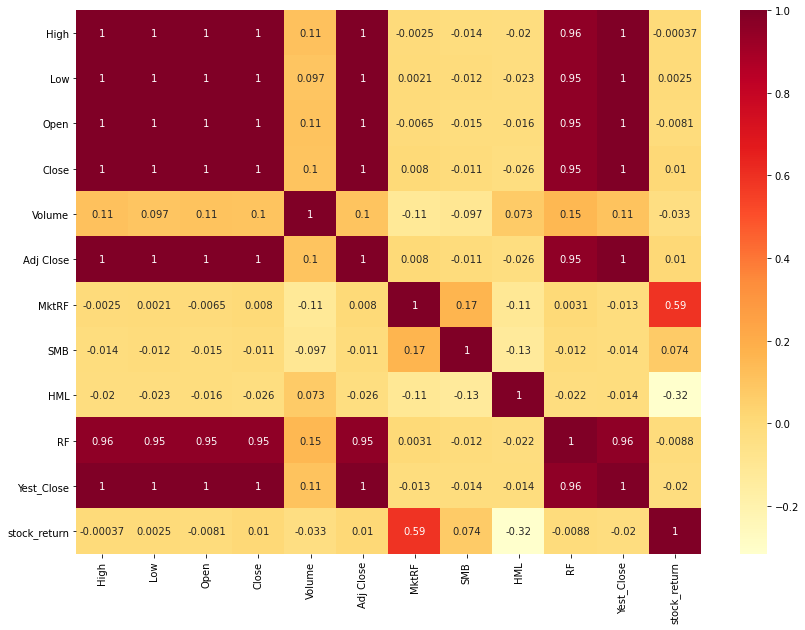

In [78]:
x = df_amzn.iloc[1:, 1:]
y = df_amzn.iloc[:, -2]
corrmat = df_amzn.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (14,10))
hm = sns.heatmap(df_amzn[top_corr_features].corr(), annot = True, cmap = "YlOrRd")